<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/02_15_Tue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Feb 15 01:25:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import numpy as np

In [5]:
def AND(x1, x2):
  w1, w2, theta = 1.0, 1.0, 1.4

  temp = x1*w1 + x2*w2
  if temp <= theta:
    return 0
  else:
    return 1

In [6]:
data = [ (0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = AND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [10]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
 # tmp = np.sum(x*w) + b
  tmp = np.dot(x, w) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [11]:
data = [ (0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = AND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [15]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  temp = np.dot(x, w) + b
  if temp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.4

  temp = np.dot(x, w) + b
  if temp <=0:
    return 0 
  else:
    return 1

In [13]:
data = [ (0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = NAND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [16]:
data = [ (0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = OR(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


In [17]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [19]:
data = [ (0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = XOR(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [21]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

init_network, forward 함수가 일종의 모델...(?)

In [25]:
def init_network():
  network = {}
  network['w1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['w2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['w3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network


def forward(network, x):
  W1, W2, W3 = network['w1'], network['w2'], network['w3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = a3

  return y


In [26]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [27]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  y = exp_x / sum_exp_x

  return y

In [28]:
print(softmax([1, 2, 0]))

[0.24472847 0.66524096 0.09003057]


In [45]:
import pickle
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
  def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row  in enumerate(T):
      row[X[idx]] = 1

      return T

  with open('/content/drive/MyDrive/딥러닝/mnist.pkl', 'rb') as f:
      dataset = pickle.load(f)


  if normalize:
      for key in ('train_img', 'test_img'):
        dataset[key] = dataset[key].astype(np.float32)
        dataset[key] /= 255.0
    
  if one_hot_label:
    dataset['train_label'] = _change_one_hot_label(dataset['train_label'])

  if not flatten:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

  return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

normalize 0\~255값을 0\~1사이의 값을 갖도록 정규화해줌

---
🤯dataset[key].shape=(60000, 784)


---


reshape(-1(60000을 의미),채널 수, (28,28)배열=784)[reshape랑 원래 shape의 값을 맞춰줘야하니까]

In [49]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

In [33]:
import pickle
with open('/content/drive/MyDrive/딥러닝/mnist.pkl', 'rb') as f:
      dataset = pickle.load(f)
      print(dataset.keys())

dict_keys(['train_img', 'train_label', 'test_img', 'test_label'])


In [34]:
dataset['train_img'].shape

(60000, 784)

In [ ]:
dataset['train_img'][0]

In [36]:
dataset['train_label'][0]

5

In [37]:
for key in ('train_img', 'test_img'):
  dataset[key] = dataset[key].astype(np.float32)
  dataset[key] /= 255.0
    

In [42]:
dataset['train_img'][0].shape

(784,)

In [39]:
def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row  in enumerate(T):
      row[X[idx]] = 1

    return T

In [40]:
dataset['train_label'].shape

(60000,)

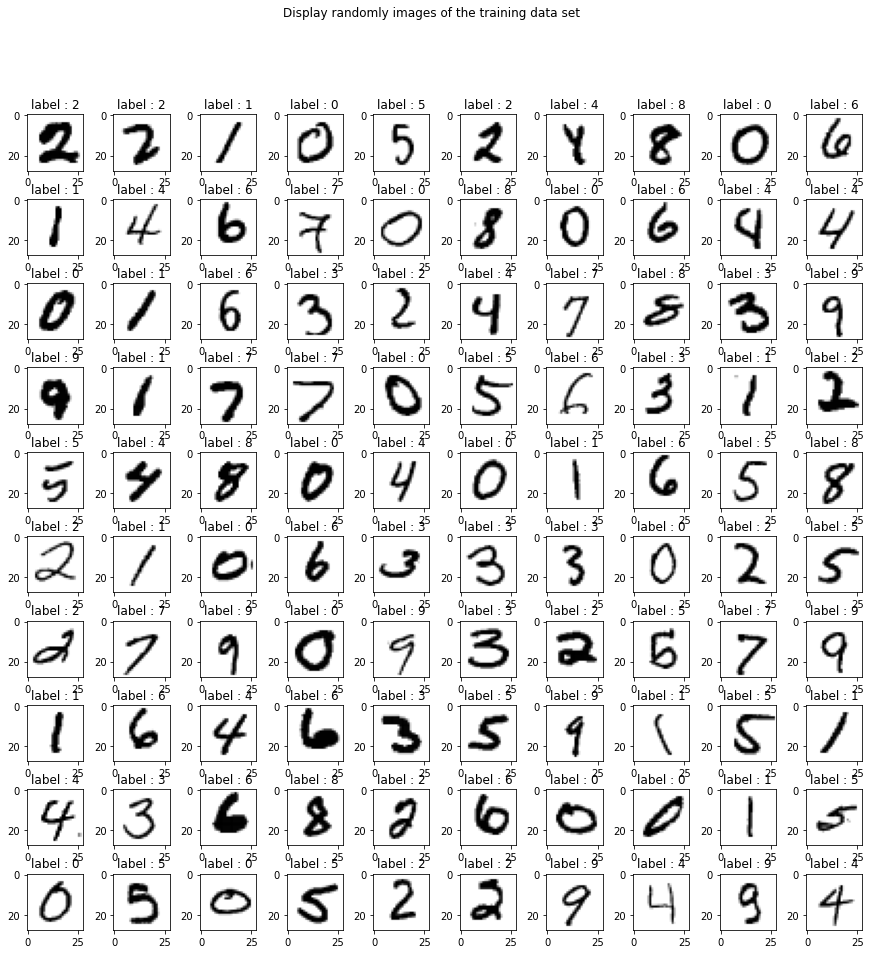

In [53]:
import matplotlib.pyplot as plt

def displayData(X, Y):
  fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
  fig.suptitle("Display randomly images of the training data set")

  for i in range(10):
    for j in range(10):
      ind = np.random.randint(X.shape[0])
      tmp = X[ind, :].reshape(28, 28)
      ax[i,j].set_title("label : {}".format(Y[ind]))
      ax[i,j].imshow(tmp, cmap='gray_r')
      plt.setp(ax[i,j].get_xticklabels(), visible=True)
      plt.setp(ax[i,j].get_xticklabels(), visible=True)

  fig.subplots_adjust(hspace=0.5, wspace=0.5)
displayData(x_train, y_train)

In [67]:
def init_network():
  with open('/content/drive/MyDrive/딥러닝/sample_weight.pkl','rb') as f:
    network = pickle.load(f)
  
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [69]:
model = init_network()

In [56]:
model.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

w1을 결정하는 것: 입력의 개수, 히든레이어(은닉층) 개수

In [58]:
model['W1'].shape

(784, 50)

In [59]:
model['W2'].shape[0]

50

In [66]:
model['W3'].shape

(100, 10)

In [70]:
accuracy_cnt = 0
for i in range(len(x_test)):
  y = predict(model, x_test[i])
  p = np.argmax(y)
  if p == y_test[i]:
    accuracy_cnt += 1

print("Accuracy  : {}".format(accuracy_cnt/len(x_test)))

Accuracy  : 0.9352
